
# Figures for the project writeup

This notebook includes the code that generates the figures in the project writeup.

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

def _read(name):
    return pd.read_csv(f"fig_data/{name}.csv").drop(columns=["Wall time"])


def _plot(d, *args, **kwargs):
    plt.plot(d["Step"], d["Value"], *args, **kwargs)

# LSTM figures

[ ] Generate plot of loss for the non-functional LSTM networks (banded and conv2d-banded).

[ ] Generate plot of CER, DER, IER, SER for the non-functional LSTM networks (banded and conv2d-banded).

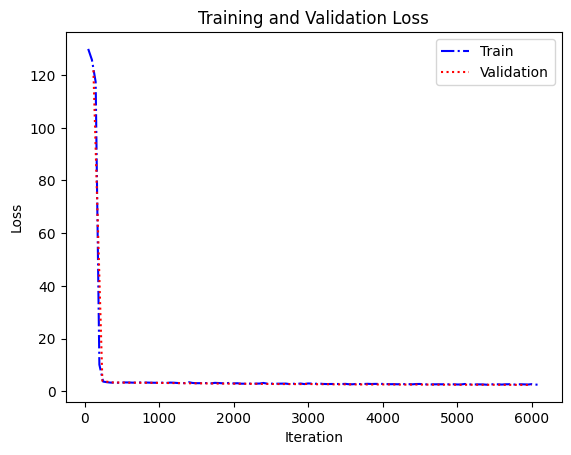

In [ ]:
#train_loss = _read("train-loss-bad-lstm")
#val_loss = _read("val-loss-bad-lstm")

#_plot(train_loss, color="blue", linestyle="-.")
#_plot(val_loss, color="red", linestyle=':')
#plt.xlabel("Iteration")
#plt.ylabel("Loss")
#plt.legend(['Train', 'Validation'], loc='upper right')
#plt.title("Training and Validation Loss")
#plt.show()


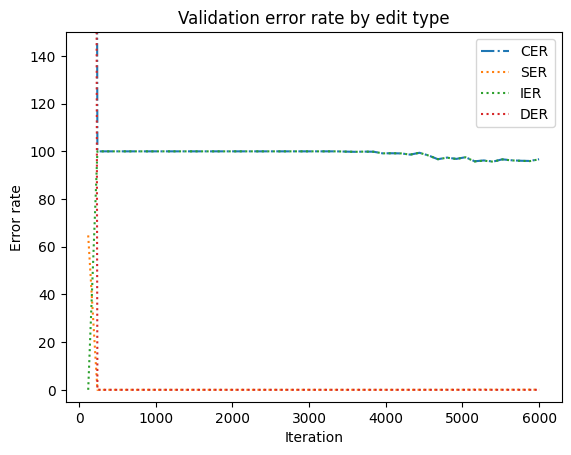

In [28]:
val_cer = _read("val-cer-bad-lstm")
val_ier = _read("val-ier-bad-lstm")
val_der = _read("val-der-bad-lstm")
val_ser = _read("val-ser-bad-lstm")

_plot(val_cer, linestyle='-.')
_plot(val_ser, linestyle=':')
_plot(val_ier, linestyle=':')
_plot(val_der, linestyle=':')
plt.xlabel("Iteration")
plt.ylabel("Error rate")
plt.ylim([-5, 150])
plt.legend(['CER', 'SER', 'IER', 'DER'], loc='upper right')
plt.title("Validation error rate by edit type")
plt.show()

# Additional data to collect

This data is important to collect, because it forms key parts of the results section. Figure out a good way to run sequential multi-jobs (I don't understand this aspect of hydra) -- probably just do it as a shell script.

[ ] Rerun the baseline (unmodified model) to get FER and AER (150 epochs)

[ ] Rerun the baseline with wavelet transforms to get FER and AER (150 epochs)

[ ] Rerun the baseline with wavelet transforms + log scaling to get FER and AER (150 epochs)

(Should be done by Monday morning)

[ ] Rerun the TDSConvLSTMCTCModule, no wavelets (150 epochs)

[ ] Rerun the TDSConvLSTMCTCModule, wavelets no log scaling (150 epochs)

[ ] Rerun the BandedLSTMModule (no wavelets) (100 epochs)

[ ] Rerun the Conv2DBandedLSTMModule (no wavelets) (100 epochs)

(Should be done before Tuesday night)

# Baseline performance

[ ] Generate a plot of CER of the baseline with and without wavelet transforms, plus the log normalized wavelet transform

[ ] Generate a plot of the FER of the baseline with and without wavelet transforms, plus the log normalized wavelet transform



# TDS Conv LSTM performance

[ ] Generate a plot of CER of the banded LSTM with and without wavelet transforms

[ ] Generate a plot of the FER of the banded LSTM with and without wavelet transforms
